In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit

## References

In [ ]:
def int_func(x):
    if x < 3:
        return x**2
    else:
        return 2 + x**2

In [ ]:
def func(x, a):
    # int_func = lambda y: y**2

    res = np.asarray([a*quad(int_func, 0, t)[0] for t in x])
    return res

In [ ]:
curve_fit(func, [1,2,3], [6,3,4])

## Fungsi

In [2]:
from lib.uem.metrices import Compute
from lib.uem.biomass import Biomassa
from lib.helpers import price_function, source_data, score_csc_compute
from lib.uem.feeding_rate import feeding_rate

f_uia, f_o2, f_temp, temperature = source_data(
    path = "data/growth_full.csv",
    temp_suitable_min = 25,
    temp_suitable_max = 33,
    temp_optimal_min = 28,
    temp_optimal_max = 32,
    do_suitable_min = 4,
    do_suitable_max = 10,
    do_optimal_min = 6,
    do_optimal_max = 9,
    ua_suitable_min = 0.00,
    ua_suitable_max = 0.16,
    ua_optimal_min = 0.00,
    ua_optimal_max = 0.06,
)


csc_suitable_min = 0.00
csc_suitable_max = 5
csc_optimal_min = 0.00
csc_optimal_max = 3

In [3]:
from lib.uem.integrate_fr import Fungsi

### Testing using dummy function

In [ ]:
def dummy_func(T, alpha):
    res = np.asarray([alpha * Fungsi(0, t, f_uia, f_o2, f_temp, 0, 0).get_integral()[0] for t in T])
    return res

In [ ]:
curve_fit(dummy_func, [1,2,3], [10, 30, 20])

In [8]:
def single_wt1(t, sr, m, alpha):
    # print(t)
    try:
        feedRate = feeding_rate(0, float(temperature[temperature["DOC"]==t]["Temp"]), 0)
    except  :
        feedRate = 0
   
    if t == 0:
        score_csc = score_csc_compute(0/1000, 0.01, csc_suitable_min, csc_suitable_max, csc_optimal_max)
        obj = Biomassa(0, t, 40, 0.05, alpha, 100, sr, m, [0.1, 0.1, 0.1], [60, 70, 80], f_uia, f_o2, f_temp, score_csc, feedRate, 0, final_doc=120)
        wt = obj.wt()
        biomass = obj.biomassa()
        cum_integral = obj._fr()
        return wt, biomass, cum_integral
    else:
        wt_1, bio_1, cum_1 = single_wt1(t-1, sr, m, alpha)
        score_csc = score_csc_compute(bio_1/1000, 1000, csc_suitable_min, csc_suitable_max, csc_optimal_max)
        obj = Biomassa(t-1, t, 40, 0.05, alpha, 100, sr, m, [0.1, 0.1, 0.1], [60, 70, 80], f_uia, f_o2, f_temp, score_csc, feedRate, cum_1, 120)
        wt = obj.wt()
        biomass = obj.biomassa()
        cum_integral = cum_1 + obj._fr()

        return wt, biomass, cum_integral

def single_wt(T, sr, m, alpha):
    
    weight = []
    biomassa = []
    cum_integral = 0
    for i in range(int(T) + 1):
        try:
            feedRate = feeding_rate(0, float(temperature[temperature["DOC"]==i-1]["Temp"]), 0)
        except  :
            feedRate = 0

        if i == 0:
            score_csc = score_csc_compute(0/1000, 0.01, csc_suitable_min, csc_suitable_max, csc_optimal_max)
            obj = Biomassa(0, i, 40, 0.05, alpha, 100, sr, m, [0.1, 0.1, 0.1], [60, 70, 80], f_uia, f_o2, f_temp, score_csc, feedRate, cum_integral, final_doc=120)
            wt = obj.wt()
            biomass = obj.biomassa()
            cum_integral = cum_integral + obj._fr()
        else:
            score_csc = score_csc_compute(biomassa[-1]/1000, 1000, csc_suitable_min, csc_suitable_max, csc_optimal_max)
            obj = Biomassa(i-1, i, 40, 0.05, alpha, 100, sr, m, [0.1, 0.1, 0.1], [60, 70, 80], f_uia, f_o2, f_temp, score_csc, feedRate, cum_integral, 120)
            wt = obj.wt()
            biomass = obj.biomassa()
            cum_integral = cum_integral + obj._fr()
        

        weight.append(wt)
        biomassa.append(biomass)

    return wt

def multi_wt(T, alpha):
    sr = 0.92
    m = -np.log(sr)/T[-1]
    # print(T)
    # res = np.asarray([single_wt1(t, sr, m, alpha)[0] for t in T])
    res = np.asarray([single_wt(t, sr, m, alpha) for t in T])
    return res

In [10]:
curve_fit(multi_wt, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.0145, 0.028, 0.0415, 0.055, 0.0685, 0.082, 0.0955, 0.109, 0.1225, 0.2025])

(array([4.38622441e-05]), array([[1.69381199e-11]]))

In [8]:
import pandas as pd

df = pd.read_csv("data/growth_full.csv", sep=";")

In [17]:
curve_fit(multi_wt, df["DOC"][:20].tolist(), df["ABW"][:20].tolist())

(array([1.34078635e-07]), array([[4.16945606e-16]]))

In [15]:
df["DOC"].tolist()[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/growth1_xxx.csv", sep=";")

<AxesSubplot:>

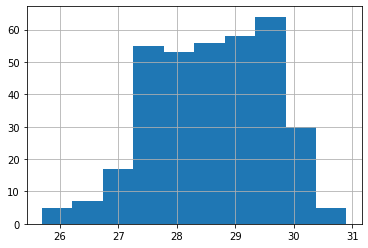

In [5]:
df["Temp"].hist()

<AxesSubplot:>

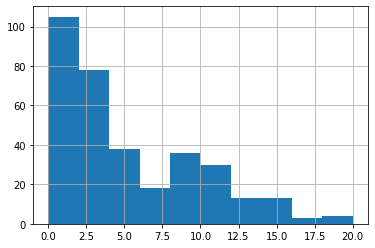

In [6]:
df["NH4"].hist()

<AxesSubplot:>

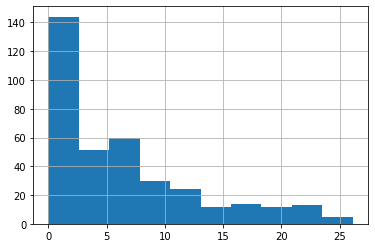

In [8]:
df["ABW"].hist()

<AxesSubplot:>

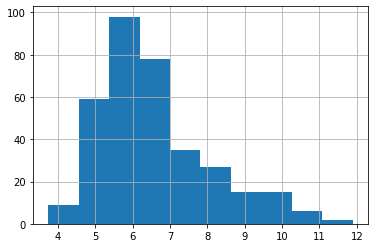

In [11]:
df["DO"].hist()

<AxesSubplot:>

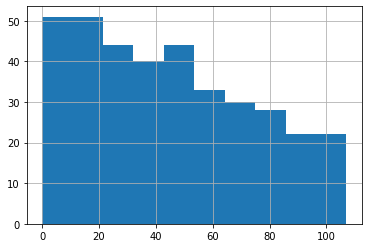

In [12]:
df["DOC"].hist()

In [19]:
import numpy as np

def scatter(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    series = [{
        "name": "scatter",
        "symbolSize": 10,
        "data": np.append(x.reshape(x.size,1), 
                y.reshape(y.size,1), axis=1).tolist(),
        "type": "scatter"
    }]

    option = {
        "xAxis": {},
        "yAxis": {},
        "series": series
    }
    return option

In [14]:
import seaborn as sns

In [15]:
iris = sns.load_dataset("iris")

In [24]:
scatter(df["DOC"], df["Temp"])

{'xAxis': {},
 'yAxis': {},
 'series': [{'name': 'scatter',
   'symbolSize': 10,
   'data': [[1.0, 28.1],
    [2.0, 28.6],
    [3.0, 28.3],
    [4.0, 28.3],
    [5.0, 28.2],
    [6.0, 28.4],
    [7.0, 28.6],
    [8.0, nan],
    [9.0, 28.8],
    [10.0, 30.1],
    [11.0, 29.9],
    [12.0, 30.1],
    [13.0, 28.9],
    [14.0, 28.3],
    [16.0, 29.0],
    [17.0, 28.3],
    [18.0, 28.9],
    [19.0, 29.6],
    [20.0, 29.3],
    [21.0, 30.1],
    [22.0, 29.7],
    [23.0, 28.4],
    [24.0, nan],
    [25.0, 28.2],
    [26.0, 28.7],
    [27.0, nan],
    [28.0, nan],
    [29.0, nan],
    [30.0, 28.9],
    [31.0, 27.7],
    [32.0, 27.4],
    [33.0, 27.7],
    [34.0, 28.6],
    [35.0, 29.1],
    [36.0, 29.2],
    [37.0, 29.5],
    [38.0, 29.9],
    [39.0, 29.6],
    [40.0, 29.1],
    [41.0, 28.1],
    [42.0, 27.8],
    [43.0, 28.0],
    [44.0, 27.6],
    [45.0, 28.2],
    [46.0, 29.0],
    [47.0, nan],
    [48.0, 28.9],
    [49.0, nan],
    [50.0, 28.9],
    [51.0, 29.0],
    [52.0, 29.1],
    [53.0

In [23]:
df

,Temp,DO,NH4,NO2,ABW,DOC,ABW.1,ADG
0,28.1,9.54,0.7,0.15,0.014500,1,0.014500,NaN
1,28.6,9.47,0.6,0.15,0.028000,2,0.028000,0.014000
2,28.3,8.88,0.0,0.00,0.041500,3,0.041500,0.014000
3,28.3,7.16,0.0,0.00,0.055000,4,0.055000,0.014000
4,28.2,11.09,0.7,0.35,0.068500,5,0.068500,0.014000
...,...,...,...,...,...,...,...,...
360,29.3,8.88,0.2,0.10,0.309737,14,0.309737,0.022053
361,29.5,8.46,NaN,NaN,0.331789,15,0.331789,0.022053
362,29.3,8.07,0.3,0.13,0.353842,16,0.353842,0.022053
363,29.0,9.59,NaN,NaN,0.375895,17,0.375895,0.022053


In [32]:
[i[1]["DOC"] for i in df.iterrows()]

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 4